**Student Activity**

Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:

*   Tentukan langkah pre-processing yang tepat untuk dataset di atas.
*   Gunakan range n_gram yang berbeda. Amati apa perbedaannya.
*   Menurut Anda, apakah term yang dihasilkan (X_kbest_features) 

pada feature selection sudah memiliki informasi yang relevan?

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa

In [93]:
#import library yang dibutuhkan
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [94]:
!pip -q install sastrawi

In [95]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Import Data**

In [96]:
#!wget https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

In [97]:
data = pd.read_csv('/content/20191002-reviews.csv') #sebelumnya saya sudah download dan sudah memasukkan ke penyimpanan google colaboratory
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,10/2/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,103357924,beli-harddisk-eksternal,Rodiyan,4,NaN,cukup puas,"barang sesuai dengan perkiraan, cuma bonus yan...",0,0,0,True,20.17,10-Jul-17,desktop,10/2/2019
1670,103357924,beli-harddisk-eksternal,Maulana A.,5,NaN,OK...,great price,0,0,0,True,20.03,17 Mei 2017,desktop,10/2/2019
1671,103357924,beli-harddisk-eksternal,Octabita H.,5,NaN,MANTAP!,Barang cepet sampainya dan kondisinya sangat B...,0,0,0,True,17.62,NaN,mobile-app,10/2/2019
1672,103357924,beli-harddisk-eksternal,Aditiya R.,5,NaN,Top,Barang sudah sampai sebelum estimasi waktu yan...,0,0,0,True,17.53,NaN,mobile-app,10/2/2019


In [98]:
data.head(10)

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,10/2/2019
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,2-Nov-17,androidApp,10/2/2019
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25-Sep-17,mobile,10/2/2019
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,10/2/2019
8,100003785,beli-harddisk-eksternal,Fadjar B.,1,NaN,NaN,baru 10 bulan layarnya dah bergaris,0,0,0,True,21.49,6-Apr-17,androidApp,10/2/2019
9,100003785,beli-harddisk-eksternal,agung p.,5,NaN,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",0,0,0,True,19.50,1-Mar-17,mobile,10/2/2019


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   itemId          1674 non-null   int64  
 1   category        1674 non-null   object 
 2   name            1674 non-null   object 
 3   rating          1674 non-null   int64  
 4   originalRating  0 non-null      float64
 5   reviewTitle     671 non-null    object 
 6   reviewContent   910 non-null    object 
 7   likeCount       1674 non-null   int64  
 8   upVotes         1674 non-null   int64  
 9   downVotes       1674 non-null   int64  
 10  helpful         1674 non-null   bool   
 11  relevanceScore  1674 non-null   float64
 12  boughtDate      1410 non-null   object 
 13  clientType      1674 non-null   object 
 14  retrievedDate   1674 non-null   object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 184.9+ KB


In [100]:
print ('Total Jumlah SMS:', data.shape[0],'data\n')
print ('terdiri dari (rating)')

print('--- [1] Sangat Kurang \t:', data[data.rating==1].shape[0],'data')
print('--- [2] Kurang \t:', data[data.rating==2].shape[0],'data')
print('--- [3] Cukup \t:', data[data.rating==3].shape[0],'data')
print('--- [4] Bagus \t:', data[data.rating==4].shape[0],'data')
print('--- [5] Sangat Bagus \t:', data[data.rating==5].shape[0],'data')

Total Jumlah SMS: 1674 data

terdiri dari (rating)
--- [1] Sangat Kurang 	: 123 data
--- [2] Kurang 	: 41 data
--- [3] Cukup 	: 93 data
--- [4] Bagus 	: 229 data
--- [5] Sangat Bagus 	: 1188 data


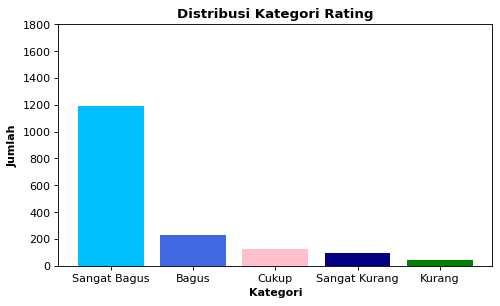

In [101]:
#Visualisasi Label SMS/SPAM Classification

height = data['rating'].value_counts()
labels = ('Sangat Bagus', 'Bagus', 'Cukup' ,'Sangat Kurang', 'Kurang')
y_pos  = np.arange(len(labels))

plt.figure (figsize=(7,4), dpi=80)
plt.ylim(0,1800)
plt.title('Distribusi Kategori Rating', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','Pink', 'navy', 'green'])
plt.xticks(y_pos,labels)
plt.show()


###**Text Pre-Processing**

###Folding and filtering

In [102]:
import re

In [103]:
#Buat fungsi langkah dari case folding dan filtering

def casefolding(text):
  text = text.lower() #Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+','',text) #Menghapus URL
  text = re.sub(r'[0-9]+','',text) #Menghapus angka
  text = re.sub(r'[^\w\s]','',text) #Karakter tanda baca
  text = text.strip()
  return text


In [104]:
raw_sample = data['reviewContent'].iloc[12]
case_folding = casefolding(raw_sample)

In [105]:
print ('Raw data \t:',raw_sample)
print ('Case folding \t:', case_folding)

Raw data 	: Apakah TV. Tsb. Suda ada anti gores..
Case folding 	: apakah tv tsb suda ada anti gores


###Word Normalization

In [106]:
#Download corpus slang word

!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-04-01 13:30:48--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.001s  

2022-04-01 13:30:48 (68.6 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [107]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join ([key_norm[key_norm['singkat']==word]['hasil'].values[0] if (key_norm['singkat']==word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

###Stopword Removal

In [108]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
#Import library stopword
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [110]:
len (stopwords_ind)

758

In [111]:
#Membuat fungsi stopword removal

tambah_stopword = ['tsb']
stopwords_ind = stopwords_ind + tambah_stopword


def remove_stop_word(text):
  clean_word =[]
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_word.append(word)
  return " ".join(clean_word)  

In [112]:
raw_sample = data['reviewContent'].iloc[12]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stop_word(normalize)

In [113]:
print ('Raw data \t:',raw_sample)
print ('Case folding \t:', case_folding)
print ('text_normalize \t:', normalize)
print ('Stop word \t:', stopword_removal)

Raw data 	: Apakah TV. Tsb. Suda ada anti gores..
Case folding 	: apakah tv tsb suda ada anti gores
text_normalize 	: apakah televisi tersebut suda ada anti gores
Stop word 	: televisi suda anti gores


###Stemming

In [114]:
from nltk.text import TextCollection
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#Di sini kita buat fungsi stemming

def stemming(text):
  text = stemmer.stem(text)
  return text

In [115]:
raw_sample = data['reviewContent'].iloc[12]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stop_word(normalize)
text_stemming = stemming(stopword_removal)

In [116]:
print ('Raw data \t:',raw_sample)
print ('Case folding \t:', case_folding)
print ('text_normalize \t:', normalize)
print ('Stop word \t:', stopword_removal)
print ('Stemming \t:', text_stemming)

Raw data 	: Apakah TV. Tsb. Suda ada anti gores..
Case folding 	: apakah tv tsb suda ada anti gores
text_normalize 	: apakah televisi tersebut suda ada anti gores
Stop word 	: televisi suda anti gores
Stemming 	: televisi suda anti gores


###Pre-Processing Pipeline

In [117]:
#CLEANING DATA

df=data[['reviewTitle','reviewContent','category']]
#menghilangkan nilai null yang ada di dataframe
#alasan agar ketika kolom kedua review digabungin hanya sisa spasi
df.fillna('', inplace = True)

#menggabungkan kolom
df['review'] = df.index
df['review'] = df['reviewTitle'].astype(str) + " " +  df['reviewContent'].astype(str)

#menghilangkan baris yang reviewnya kosong
df.drop(df[df.review ==' '].index, inplace=True)

df=df[['review','category']] 
df


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,review,category
0,bagus mantap dah sesui pesanan,beli-harddisk-eksternal
1,"Bagus, sesuai foto",beli-harddisk-eksternal
2,ok mantaaapppp barang sesuai pesanan.. good ok...,beli-harddisk-eksternal
3,bagus sesuai,beli-harddisk-eksternal
7,ada pengirimn ntb bima bima,beli-harddisk-eksternal
...,...,...
1668,Tiga Bintang Antivirusnya ko malah jd kya viru...,beli-harddisk-eksternal
1669,"cukup puas barang sesuai dengan perkiraan, cum...",beli-harddisk-eksternal
1670,OK... great price,beli-harddisk-eksternal
1671,MANTAP! Barang cepet sampainya dan kondisinya ...,beli-harddisk-eksternal


In [118]:
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_word(text)
  text = stemming(text)
  return text

In [119]:
#Time untuk mendapatkan waktu komputasi
%%time 
#proses menjalankan fungsi text_preprocessing pada data teks
data['clean_mantap'] = data['reviewTitle'].astype(str) + " " +  data['reviewContent'].astype(str).apply(text_preprocessing)


CPU times: user 3min 16s, sys: 534 ms, total: 3min 16s
Wall time: 3min 24s


In [120]:
#Optional aj yah,
#Simpan data , jika anda ingin menggunakan data clean_teks
data.to_csv('clean_review.csv')

###Feature Engineering/Feauture Extraction

In [121]:
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate,clean_mantap
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019,nan bagus mantap sesui pesan
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019,nan bagus sesuai foto
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019,ok mantaaapppp barang sesuai pesanan.. good ok...
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019,nan bagus sesuai
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,10/2/2019,nan nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,103357924,beli-harddisk-eksternal,Rodiyan,4,NaN,cukup puas,"barang sesuai dengan perkiraan, cuma bonus yan...",0,0,0,True,20.17,10-Jul-17,desktop,10/2/2019,cukup puas barang sesuai kira bonus sesuai ter...
1670,103357924,beli-harddisk-eksternal,Maulana A.,5,NaN,OK...,great price,0,0,0,True,20.03,17 Mei 2017,desktop,10/2/2019,OK... great harga
1671,103357924,beli-harddisk-eksternal,Octabita H.,5,NaN,MANTAP!,Barang cepet sampainya dan kondisinya sangat B...,0,0,0,True,17.62,NaN,mobile-app,10/2/2019,MANTAP! barang cepat sampai kondisi bagus coba...
1672,103357924,beli-harddisk-eksternal,Aditiya R.,5,NaN,Top,Barang sudah sampai sebelum estimasi waktu yan...,0,0,0,True,17.53,NaN,mobile-app,10/2/2019,Top barang estimasi tentu packing rapi bonus l...


In [122]:
X = data['clean_mantap']
y = data['rating']

In [123]:
y

0       5
1       4
2       5
3       4
4       5
       ..
1669    4
1670    5
1671    5
1672    5
1673    5
Name: rating, Length: 1674, dtype: int64

In [124]:
X

0                            nan bagus mantap sesui pesan
1                                   nan bagus sesuai foto
2       ok mantaaapppp barang sesuai pesanan.. good ok...
3                                        nan bagus sesuai
4                                                 nan nan
                              ...                        
1669    cukup puas barang sesuai kira bonus sesuai ter...
1670                                    OK... great harga
1671    MANTAP! barang cepat sampai kondisi bagus coba...
1672    Top barang estimasi tentu packing rapi bonus l...
1673                                              nan nan
Name: clean_mantap, Length: 1674, dtype: object

###Feature Extraction (Bag of Word & N-Gram)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

#BoW  - Unigram
vec = CountVectorizer(ngram_range=(1,5))
vec.fit(X)

CountVectorizer(ngram_range=(1, 5))

In [126]:
#Melihat Jumlah Feature
print(len(vec.get_feature_names_out()))

25318


In [127]:
print ('Fitur:', vec.get_feature_names_out(10))

Fitur: ['10jt' '10jt kebawah' '10jt kebawah yah' ... 'zooonk' 'zooonk televisi'
 'zooonk televisi mati']


In [128]:
X_unigram = vec.transform(X).toarray()
X_unigram 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [129]:
data_unigram = pd.DataFrame(X_unigram,columns=vec.get_feature_names_out())
data_unigram

,10jt,10jt kebawah,10jt kebawah yah,10jt kebawah yah lumayan,10jt kebawah yah lumayan lahtapi,170i,170i juragan,170i juragan beda,170i juragan beda sharp,170i juragan beda sharp aquos,...,youtube situs berita browser bawa,yuda,yuda puas,yuda puas produk,yuda puas produk terimakasih,yyy,yyy dd,zooonk,zooonk televisi,zooonk televisi mati
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Feature Extraction (TF-IDF & N-Gram)

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

In [131]:
#Melihat Jumlah Feature
print(len(tf_idf.get_feature_names_out()))

1995


In [132]:
# Melihat fitur-fitur di dalam corpus

print ('Fitur:', vec.get_feature_names_out(10))

Fitur: ['10jt' '10jt kebawah' '10jt kebawah yah' ... 'zooonk' 'zooonk televisi'
 'zooonk televisi mati']


In [133]:
# Melihat vektor kata 

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [134]:
data_tf_idf = pd.DataFrame(X_tf_idf,columns=tf_idf.get_feature_names_out())
data_tf_idf

,10jt,170i,1tb,23,24,24le175i,2tb,43877577,4tb,5inch,...,yangbbelum,yanpa,yapersyaratan,yey,yg,you,youtube,yuda,yyy,zooonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Feature Selection

In [135]:
X = np.array(data_tf_idf)
y = np.array (y)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [136]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Proses Algoritme
chi2_features = SelectKBest(chi2, k=900)
X_kbest_features = chi2_features.fit_transform(X,y)

#Melihat data
print ('Original feature:',X.shape[1])
print ('selected feature:',X_kbest_features.shape[1])

Original feature: 1995
selected feature: 900


In [137]:
#Membuat dataframe nilai setiap fitur dari Chi-square

data_chi2 = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
data_chi2

,Nilai
0,1.675623
1,0.149275
2,0.529553
3,0.101594
4,0.360296
...,...
1990,0.184537
1991,4.107919
1992,12.497509
1993,9.153259


In [138]:
feature = tf_idf.get_feature_names_out()
data_chi2['Fitur'] = feature
data_chi2

,Nilai,Fitur
0,1.675623,10jt
1,0.149275,170i
2,0.529553,1tb
3,0.101594,23
4,0.360296,24
...,...,...
1990,0.184537,you
1991,4.107919,youtube
1992,12.497509,yuda
1993,9.153259,yyy


In [139]:
#Mengurutkan fitur berdasarkan nilai tertinggi
data_chi2.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
849,51.307221,kecewa
1193,45.835720,nan
520,42.412348,empat
485,41.049820,dua
1719,39.829268,stock
...,...,...
503,0.042793,eks
882,0.042793,kesel
1712,0.042793,stabil
251,0.042793,brjalan


In [140]:
#Menampilkan mask pada feature yang terseleksi

#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True, False, False, ...,  True,  True,  True])

In [141]:
feature

array(['10jt', '170i', '1tb', ..., 'yuda', 'yyy', 'zooonk'], dtype=object)

In [142]:
#Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi

new_features = []

for bool, f in zip(mask,feature):
  if bool:
    new_features.append(f)
  selected_features = new_features

In [143]:
data_selected_features = pd.DataFrame(X_kbest_features,columns=selected_features)
data_selected_features

,10jt,43877577,8gb,abal,abang,aceh,ad,ada,adaada,adahanya,...,yacc,yah,yang,yanpa,yapersyaratan,yg,youtube,yuda,yyy,zooonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Word Cloud

In [144]:
import cv2
from wordcloud import WordCloud


#download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-04-01 13:34:15--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg.1’

cloud.jpg.1         100%[===================>]  33.59K  --.-KB/s    in 0s      

2022-04-01 13:34:15 (107 MB/s) - ‘cloud.jpg.1’ saved [34396/34396]



In [145]:
original_image = cv2.imread('cloud.jpg')
grayimage = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
(tresh,cloud_mask) = cv2.threshold(grayimage,100,255,cv2.THRESH_BINARY)

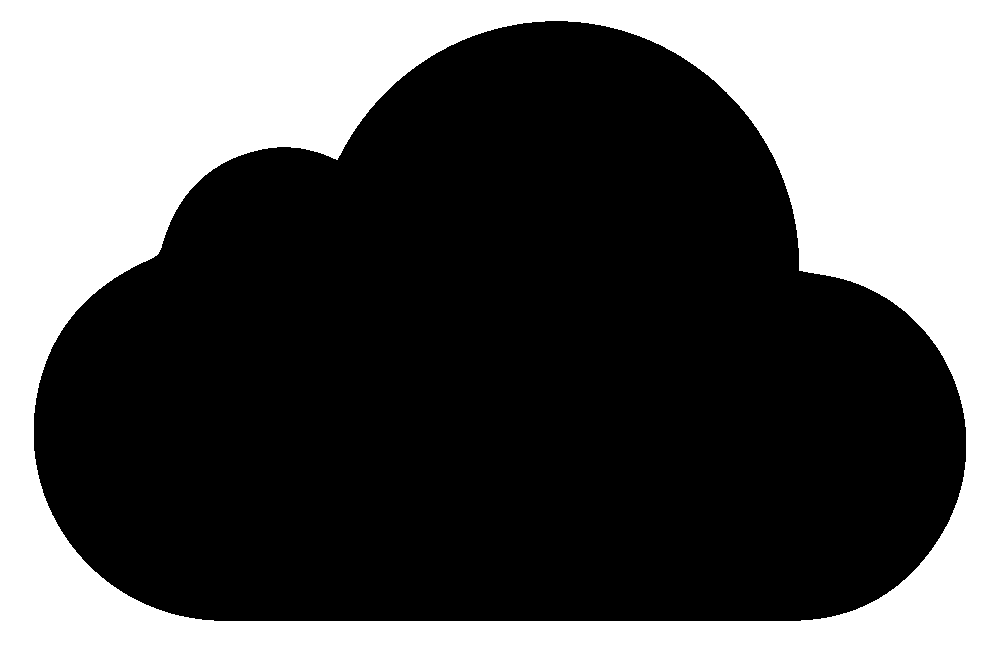

In [146]:
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

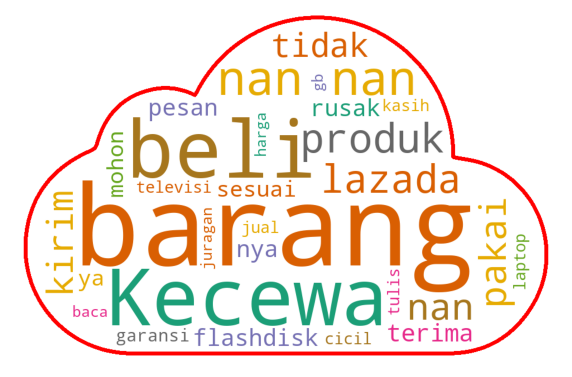

In [147]:
#Word cloud untuk sangat kurang

sangat_kurang = data[data.rating==1]
normal_string = []

for t in sangat_kurang.clean_mantap:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='red',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Menurut Anda, apakah term yang dihasilkan (X_kbest_features) pada feature selection sudah memiliki informasi yang relevan?

**YA, feature selection membantu dalam memberikan informasi yang relevan, Lebih baik menggunakan X_kbest yang standar dan tidak terlalu banyak atau terlalu sedikit X karena bisa menyebabkan bias/jelek dalam data**

**resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.**

Berdasarkan pengalaman saya dalam melakukan proses ini ternyata cukup panjang dan memakan banyak waktu daripada proses deploynya.

###Terima Kasih Coach